#Credit Card Fraud Detection DataSet
### Sampling Techniques applied on dataset to even the two groups
####It contains the following info:

**Time** - Number of seconds elapsed between this transaction and the first transaction in the dataset
**V1** - may be result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)
.
.
.
.
**Amount** - Transaction amount
**Class** - 1 for fraudulent transactions, 0 otherwise

###Section#1 :: Load the dataset and Describe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import os
from google.colab import drive
drive.mount("/content/gdrive") 
os.chdir('/content/gdrive/MyDrive/Interview Kickstart/EDA Feature Engineering/Datasets')

Mounted at /content/gdrive


In [3]:
creditcard_dataset = pd.read_csv('creditcard.csv')

In [4]:
creditcard_dataset.head(n=4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0


In [5]:
creditcard_dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
len(creditcard_dataset)

284807

###Section#2 :: Analyze the dataset and look for attributes/ relationship(EDA/Data Preprocessing)

In [7]:
from collections import Counter
Counter(creditcard_dataset['Class'])
#Inference 1

Counter({0: 284315, 1: 492})

**Inference#1** - We can see that the data is HIGHLY unbalanced, meaning the data in class variable of 0 is very high compared to the class variable of 1

In [8]:
import seaborn as sns
count_class = pd.value_counts(creditcard_dataset['Class'])
print(count_class)

0    284315
1       492
Name: Class, dtype: int64


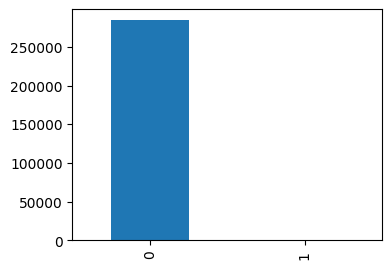

In [9]:
plt.figure(figsize=(4,3))
count_class.plot(kind='bar')
plt.ylabel = 'Frequency'
plt.xlabel ='Class'

**Inference#2** - The columns starting with 'V' are already the Principal Components. So there is nothing much that we can do with these columns. Now, the column "Time" is the time elapsed between each transaction. Is this really an important field for us? No. It really will not have any significance in detecting whether a transaction is fraudulent or genuine. So let's drop this column. The "Amount" column is necessary. So we shall standardise the Amount data, since all the other columns have been obtained through PCA, and PCA ALWAYS works on Standardised data.

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
creditcard_dataset['standard_Amount']=sc.fit_transform(creditcard_dataset['Amount'].values.reshape(-1,1))

In [11]:
creditcard_dataset.head(n=4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,standard_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534


In [12]:
#Drop the "Time" field and the "Amount" field. We shall use the new "s_Amount field" with scaled data for our modelling
creditcard_dataset = creditcard_dataset.drop(['Time', 'Amount'], axis=1)
creditcard_dataset.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'standard_Amount'],
      dtype='object')

In [13]:
x = creditcard_dataset.loc[:, creditcard_dataset.columns!= 'Class']
y = creditcard_dataset.loc[:, creditcard_dataset.columns == 'Class']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state = 62)

###Section#3 :: Try to balance the imbalanced dataset

####**`Undersampling`**
#####`Method 1`
Follow below Steps:-

1.   Find the number of the minority class
2.   Find the indices of the majority class
3.   Find the indices of the minority class
4.   Randomly sample the majority indices with respect to the minority numbers
5.   Concat the minority indices with the indices from step 4
6.   Get the balanced dataframe - This is the final undersampled data

#####`Method 2`
NearMiss Algorithm – Undersampling

Disadvantage is you will lose critical data as you are reducing the instances of the majority class and your accuracy will increase but recall will decrease.

In [15]:
print("Before Undersampling, counts of label 1: {}",len(y_train[y_train.Class==1]))
print("Before Undersampling, counts of label 0: {}",len(y_train[y_train.Class==0]))

Before Undersampling, counts of label 1: {} 374
Before Undersampling, counts of label 0: {} 213231


In [16]:
#1. Find the number of the minority class
number_fraud = len(creditcard_dataset[creditcard_dataset['Class']==1])
print(number_fraud)

492


In [17]:
#2. Find the indices of the majority class
index_non_fraud = creditcard_dataset[creditcard_dataset['Class']==0].index
print(index_non_fraud)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=284315)


In [18]:
#.3 Find the indices of the minority class
index_fraud = creditcard_dataset[creditcard_dataset['Class']==1].index
print(index_fraud)

Int64Index([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
              6338,   6427,
            ...
            274382, 274475, 275992, 276071, 276864, 279863, 280143, 280149,
            281144, 281674],
           dtype='int64', length=492)


In [19]:
#4. Randomly sample the majority indices with respect to the number of minority classes
random_indices = np.random.choice(index_non_fraud, number_fraud,replace='False')
len(random_indices)

492

In [20]:
#5. Concat the minority indices with the indices from step 4
under_sample_indices = np.concatenate([index_fraud,random_indices])
under_sample_indices

array([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
         6338,   6427,   6446,   6472,   6529,   6609,   6641,   6717,
         6719,   6734,   6774,   6820,   6870,   6882,   6899,   6903,
         6971,   8296,   8312,   8335,   8615,   8617,   8842,   8845,
         8972,   9035,   9179,   9252,   9487,   9509,  10204,  10484,
        10497,  10498,  10568,  10630,  10690,  10801,  10891,  10897,
        11343,  11710,  11841,  11880,  12070,  12108,  12261,  12369,
        14104,  14170,  14197,  14211,  14338,  15166,  15204,  15225,
        15451,  15476,  15506,  15539,  15566,  15736,  15751,  15781,
        15810,  16415,  16780,  16863,  17317,  17366,  17407,  17453,
        17480,  18466,  18472,  18773,  18809,  20198,  23308,  23422,
        26802,  27362,  27627,  27738,  27749,  29687,  30100,  30314,
        30384,  30398,  30442,  30473,  30496,  31002,  33276,  39183,
        40085,  40525,  41395,  41569,  41943,  42007,  42009,  42473,
      

In [21]:
#Get the balanced dataframe - This is the final undersampled data
under_sample_df = creditcard_dataset.iloc[under_sample_indices]
under_sample_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,standard_Amount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.606031
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.117342
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.349231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248884,1.987430,-0.510845,-0.436947,0.420656,-0.657904,-0.203586,-0.744505,0.108322,1.657428,-0.134604,...,0.170002,0.646087,0.164584,0.721395,-0.115765,-0.241994,0.028194,-0.032492,0,-0.313289
49328,1.035337,0.197668,0.401321,1.136392,-0.132972,-0.296514,0.199261,0.054935,-0.419454,0.136644,...,-0.353491,-1.201653,0.228695,0.145138,0.093064,-0.841638,0.012645,0.026148,0,-0.133535
23013,1.110609,-1.386565,0.995964,-0.529203,-1.264645,1.288258,-1.468374,0.478085,0.291327,0.386742,...,0.168666,0.562680,-0.231439,-0.786661,0.422598,-0.062132,0.067453,0.020885,0,0.058573
255031,-0.662570,0.089301,1.502041,-1.052362,0.009439,0.057583,0.290276,0.287767,0.319403,-0.835675,...,0.297320,0.751637,-0.147861,-0.381567,-0.250429,0.466570,0.068028,0.133419,0,-0.120941


In [22]:
Counter(under_sample_df['Class'])

Counter({1: 492, 0: 492})

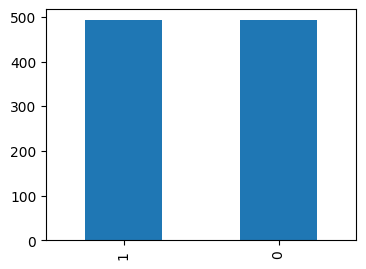

In [23]:
plt.figure(figsize=(4,3))
under_sample_class_counts = pd.value_counts(under_sample_df['Class'])
under_sample_class_counts.plot(kind='bar')
plt.ylabel = 'Frequency'
plt.xlabel ='Class'

In [24]:
#Another way using Near Miss Algorithm
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
x_train_miss, y_train_miss = nr.fit_resample(x_train, y_train)

In [25]:
print("After Undersampling, counts of label 1: {}",len(y_train_miss[y_train_miss.Class==1]))
print("After Undersampling, counts of label 0: {}",len(y_train_miss[y_train_miss.Class==0]))

After Undersampling, counts of label 1: {} 374
After Undersampling, counts of label 0: {} 374


####**`Oversampling`**
#####`Method 1`
Follow below Steps:-

1.   Find the number of the minority class
2.   Find the indices of the majority class
3.   Find the indices of the minority class
4.   Randomly sample the minority indices with respect to the majority numbers
5.   Concat the majority indices with the indices from step 4
6.   Get the balanced dataframe - This is the final undersampled data

#####`Method 2`
SMOTE – OverSampling

Disadvantage is it will cause OVERFITTING as we are increasing the samples of the minority class and your accuracy will increase but recall will decrease.

In [26]:
print("Before Oversampling, counts of label 1: {}",len(y_train[y_train.Class==1]))
print("Before Oversampling, counts of label 0: {}",len(y_train[y_train.Class==0]))

Before Oversampling, counts of label 1: {} 374
Before Oversampling, counts of label 0: {} 213231


In [27]:
number_non_fraud = len(creditcard_dataset[creditcard_dataset['Class']==0])
print(number_non_fraud)

284315


In [28]:
fraud_sample = creditcard_dataset[creditcard_dataset['Class']==1].sample(number_non_fraud, replace=True)

In [29]:
#create a new dataframe containing only non-fraud data
df_fraud = creditcard_dataset[creditcard_dataset['Class']==0]
over_sample_df = pd.concat([fraud_sample,df_fraud], axis=0)
over_sample_class_counts=pd.value_counts(over_sample_df['Class'])

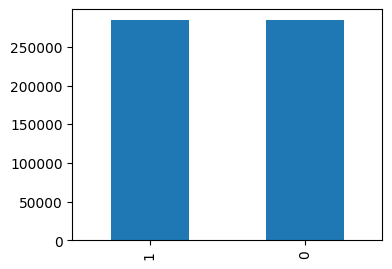

In [30]:
plt.figure(figsize=(4,3))
over_sample_class_counts.plot(kind='bar')
plt.xlabel = 'Class'
plt.ylabel = 'Frequency'

In [31]:
Counter(over_sample_df['Class'])


Counter({1: 284315, 0: 284315})

In [32]:
#Another way of overSampling is by using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE

In [33]:
#SMOTE.fit_sample gives me the resampled data i.e the oversampled data
sm = SMOTE()
x_train_sampled, y_train_sampled = sm.fit_resample(x_train, y_train)

In [34]:
print("After Oversampling, counts of label 1: {}",len(y_train_sampled[y_train_sampled.Class==1]))
print("After Oversampling, counts of label 0: {}",len(y_train_sampled[y_train_sampled.Class==0]))

After Oversampling, counts of label 1: {} 213231
After Oversampling, counts of label 0: {} 213231
